**ANN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_excel('DATA.xlsx')

In [ ]:
dataset.head()

,COUNTRY,YEARS,HEALTHY_LIFE_SPAN,HEALTH_EXPENSES_M,NUMBER_OF_HOSPITAL,NUMBER_OF_DOCTORS,MEDICAL_DOCTORS_PER_1000_PEOPLE,LEVEL_OF_SATISFACTION_WITH_GENERAL_HEALTH_STATIUS,NUMBER_OF_PATIENT_BED
0,BELGIUM,2017,81.4,48058,175,35069,3.07,84.10,16644.0
1,BELGIUM,2018,81.5,49968,174,35762,3.11,84.43,16636.0
2,BELGIUM,2019,81.8,51672,164,36343,5.90,85.30,16738.0
3,BELGIUM,2020,80.8,51489,163,37089,4.02,84.43,16730.0
4,BELGIUM,2021,81.7,55492,163,37630,4.02,83.90,16886.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   COUNTRY                                            30 non-null     object 
 1   YEARS                                              30 non-null     int64  
 2   HEALTHY_LIFE_SPAN                                  30 non-null     float64
 3   HEALTH_EXPENSES_M                                  30 non-null     int64  
 4   NUMBER_OF_HOSPITAL                                 30 non-null     int64  
 5   NUMBER_OF_DOCTORS                                  30 non-null     int64  
 6   MEDICAL_DOCTORS_PER_1000_PEOPLE                    30 non-null     float64
 7   LEVEL_OF_SATISFACTION_WITH_GENERAL_HEALTH_STATIUS  30 non-null     float64
 8   NUMBER_OF_PATIENT_BED                              30 non-null     float64
dtypes: float64(4)

In [ ]:
numeric_dataset = dataset.select_dtypes(include=[float, int])
correlation_matrix = numeric_dataset.corr()
correlation_matrix

,YEARS,HEALTHY_LIFE_SPAN,HEALTH_EXPENSES_M,NUMBER_OF_HOSPITAL,NUMBER_OF_DOCTORS,MEDICAL_DOCTORS_PER_1000_PEOPLE,LEVEL_OF_SATISFACTION_WITH_GENERAL_HEALTH_STATIUS,NUMBER_OF_PATIENT_BED
YEARS,1.000000,-0.035924,0.197878,-0.003516,0.023537,0.030000,0.083094,0.090637
HEALTHY_LIFE_SPAN,-0.035924,1.000000,-0.215279,0.238724,0.415524,0.723690,0.703538,0.232108
HEALTH_EXPENSES_M,0.197878,-0.215279,1.000000,0.816965,0.680702,0.129181,-0.449895,0.837696
NUMBER_OF_HOSPITAL,-0.003516,0.238724,0.816965,1.000000,0.836335,0.344619,-0.091474,0.928782
NUMBER_OF_DOCTORS,0.023537,0.415524,0.680702,0.836335,1.000000,0.610159,0.091025,0.865065
MEDICAL_DOCTORS_PER_1000_PEOPLE,0.030000,0.723690,0.129181,0.344619,0.610159,1.000000,0.219731,0.358898
LEVEL_OF_SATISFACTION_WITH_GENERAL_HEALTH_STATIUS,0.083094,0.703538,-0.449895,-0.091474,0.091025,0.219731,1.000000,-0.054340
NUMBER_OF_PATIENT_BED,0.090637,0.232108,0.837696,0.928782,0.865065,0.358898,-0.054340,1.000000


In [ ]:
dataset.describe()

,YEARS,HEALTHY_LIFE_SPAN,HEALTH_EXPENSES_M,NUMBER_OF_HOSPITAL,NUMBER_OF_DOCTORS,MEDICAL_DOCTORS_PER_1000_PEOPLE,LEVEL_OF_SATISFACTION_WITH_GENERAL_HEALTH_STATIUS,NUMBER_OF_PATIENT_BED
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019.00000,80.233333,153226.733333,987.933333,122063.133333,4.640000,79.546333,93675.643667
std,1.43839,3.269961,89403.198802,1077.337297,99090.995258,2.117645,6.058641,92495.969264
min,2017.00000,73.600000,48058.000000,60.000000,6225.000000,1.800000,62.500000,172.310000
25%,2018.00000,77.225000,54718.750000,100.000000,36529.500000,3.190000,77.850000,16665.500000
50%,2019.00000,82.000000,154657.000000,610.000000,97526.500000,4.285000,79.975000,21977.000000
75%,2020.00000,82.675000,192713.500000,1534.000000,239711.750000,6.500000,84.050000,180464.250000
max,2021.00000,83.600000,353941.000000,3046.000000,242921.000000,8.010000,88.200000,246337.000000


<Axes: >

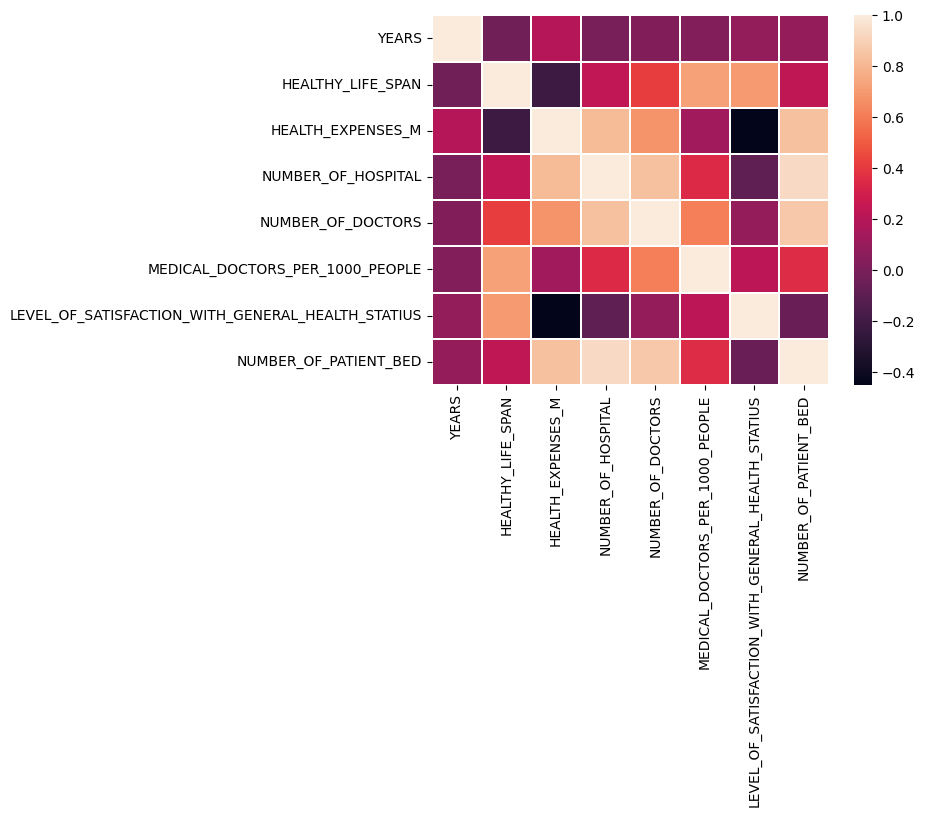

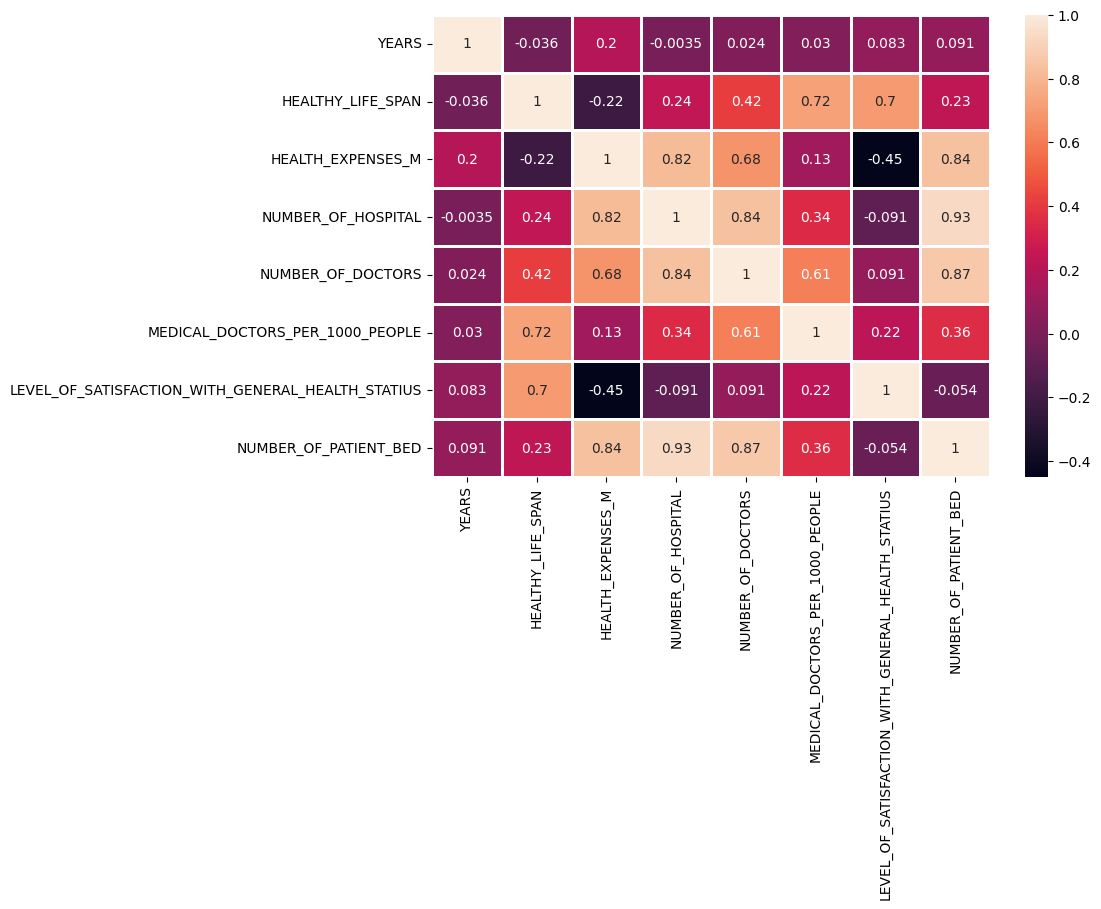

In [ ]:


j = correlation_matrix
sns.heatmap(j, linewidths=.2)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(j, annot=True, linewidths=1, ax=ax)


In [ ]:
X=dataset.iloc[:,[3,7]].values
y=dataset.iloc[:,7].values

In [ ]:
y

array([84.1 , 84.43, 85.3 , 84.43, 83.9 , 78.75, 79.2 , 77.7 , 78.8 ,
       78.65, 77.1 , 79.2 , 76.25, 78.8 , 78.3 , 80.75, 81.48, 81.05,
       81.48, 82.65, 65.4 , 70.3 , 62.5 , 69.8 , 76.25, 86.1 , 85.96,
       88.2 , 85.96, 83.6 ])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
X_train=sc1.fit_transform(X_train)
X_test=sc1.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D,MaxPooling2D


In [ ]:
dataset=dataset.values

In [ ]:
dataset

array([['BELGIUM', 2017, 81.4, 48058, 175, 35069, 3.07, 84.1, 16644.0],
       ['BELGIUM', 2018, 81.5, 49968, 174, 35762, 3.11, 84.43, 16636.0],
       ['BELGIUM', 2019, 81.8, 51672, 164, 36343, 5.9, 85.3, 16738.0],
       ['BELGIUM', 2020, 80.8, 51489, 163, 37089, 4.02, 84.43, 16730.0],
       ['BELGIUM', 2021, 81.7, 55492, 163, 37630, 4.02, 83.9, 16886.0],
       ['TURKIYE', 2017, 77.1, 140647, 1518, 149997, 1.85, 78.75, 172.31],
       ['TURKIYE', 2018, 77.6, 165234, 1534, 153128, 1.81, 79.2,
        177189.0],
       ['TURKIYE', 2019, 77.8, 201031, 1538, 160810, 1.8, 77.7, 181556.0],
       ['TURKIYE', 2020, 75.8, 249932, 1534, 171259, 1.83, 78.8,
        193942.0],
       ['TURKIYE', 2021, 76.0, 353941, 1547, 183569, 1.83, 78.65,
        195682.0],
       ['FRANCE', 2017, 82.5, 260840, 3046, 241512, 6.53, 77.1, 246337.0],
       ['FRANCE', 2018, 82.6, 264879, 3042, 240301, 6.51, 79.2, 243469.0],
       ['FRANCE', 2019, 82.7, 270305, 3008, 241945, 6.48, 76.25,
        241020.0],
  

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K

# Sigmoid fonksiyonunu tanımlama
def sigmoid(x):
    return 1 / (1 + K.exp(-x))

# Tanh fonksiyonunu sigmoid ile tanımlama
def tanh_using_sigmoid(x):
    return 2 * sigmoid(2 * x) - 1

# Örnek bir model tanımlama
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,)),
    tf.keras.layers.Activation(tanh_using_sigmoid),  # Aktivasyon fonksiyonu olarak tanımlandı
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu')
])

# Modeli derleme
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Model özetini gösterme
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                30        
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_44 (Dense)            (None, 15)                165       
                                                                 
 dense_45 (Dense)            (None, 40)                640       
                                                                 
Total params: 835 (3.26 KB)
Trainable params: 835 (3.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Örnek veri oluşturma
np.random.seed(0)
X_train = np.random.rand(1000, 2)  # 1000 örnek, her biri 2 özellikten oluşan veri
y_train = np.random.randint(2, size=(1000,))  # 0 veya 1 sınıflarından oluşan hedef veri
# Test verilerini oluşturma
X_test = np.random.rand(100, 2)  # 100 örnek, her biri 2 özellikten oluşan test verisi
y_test = np.random.rand(100, 1)   # 100 örnek, her biri bir etiket değeri oluştur

# Modeli tanımlama
model = Sequential([
    Dense(10, activation='sigmoid', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

# Modeli derleme
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
h=model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.2)


Epoch 1/200
25/25 [==============================] - 1s 13ms/step - loss: 0.6960 - accuracy: 0.5125 - val_loss: 0.7064 - val_accuracy: 0.4700
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5163 - val_loss: 0.7037 - val_accuracy: 0.4550
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5263 - val_loss: 0.7029 - val_accuracy: 0.4500
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5300 - val_loss: 0.7021 - val_accuracy: 0.4750
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5213 - val_loss: 0.7018 - val_accuracy: 0.4600
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5225 - val_loss: 0.7015 - val_accuracy: 0.4550
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5138 - val_loss: 0.7015 - val_accuracy: 0.4550
Epoch 8/200


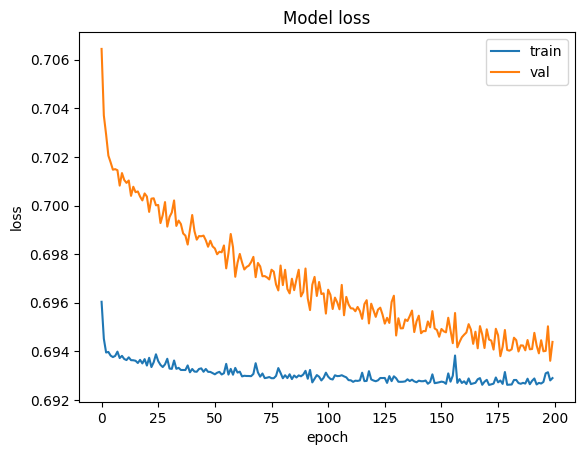

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper right')
plt.show()

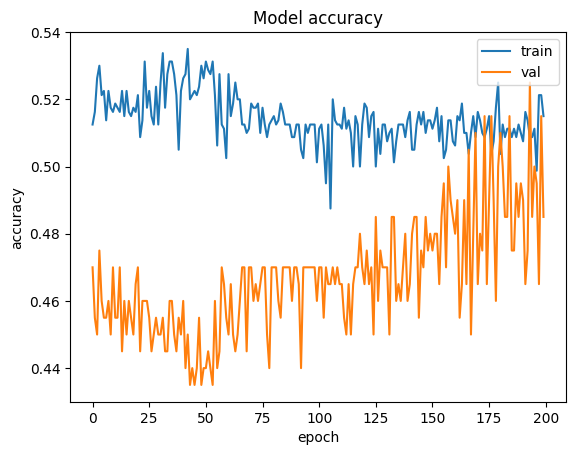

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='upper right')
plt.show()

In [ ]:


# Tahminlerin ortalamasını alma
average_prediction = np.mean(predictions)

print("Tahminlerin Ortalaması:", average_prediction)

Tahminlerin Ortalaması: 0.513929


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test verileri üzerindeki kayıp (loss):", loss)


4/4 [==============================] - 0s 16ms/step - loss: 0.6946 - accuracy: 0.0000e+00
Test verileri üzerindeki kayıp (loss): 0.6945939064025879


In [ ]:
pred=model.predict(X_test)
pred=[1 if y.any()>=0.5 else 0 for y in pred]
y_test_binary = (y_test > 0.5).astype("int32")
print(pred)
print(y_test_binary)


4/4 [==============================] - 0s 3ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [ ]:
print(y_test)

[[0.15805973]
 [0.66508162]
 [0.73840244]
 [0.58820178]
 [0.98280335]
 [0.49946149]
 [0.13629234]
 [0.68629106]
 [0.60207552]
 [0.59042148]
 [0.54585364]
 [0.93909571]
 [0.1291564 ]
 [0.0731973 ]
 [0.15411717]
 [0.24499021]
 [0.59294632]
 [0.61242525]
 [0.23260188]
 [0.4892255 ]
 [0.48206185]
 [0.45311077]
 [0.80354529]
 [0.47169307]
 [0.7583655 ]
 [0.16648113]
 [0.53196734]
 [0.82410478]
 [0.17771658]
 [0.46492217]
 [0.60907932]
 [0.18477457]
 [0.75676561]
 [0.07899625]
 [0.94641551]
 [0.46822149]
 [0.33612309]
 [0.11680701]
 [0.43259664]
 [0.65980403]
 [0.09448728]
 [0.3062691 ]
 [0.83601758]
 [0.64618103]
 [0.20637301]
 [0.1609098 ]
 [0.90448503]
 [0.28702022]
 [0.17950017]
 [0.99996402]
 [0.30919183]
 [0.12474019]
 [0.46175763]
 [0.43434511]
 [0.92680248]
 [0.13420495]
 [0.09113641]
 [0.09297867]
 [0.90428747]
 [0.44936918]
 [0.15060653]
 [0.5938301 ]
 [0.53762336]
 [0.19840675]
 [0.60303814]
 [0.34023123]
 [0.23837077]
 [0.51040061]
 [0.29164926]
 [0.22213992]
 [0.87972241]
 [0.15

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test_binary,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.43      1.00      0.60        43

    accuracy                           0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Confusion Matrix:\n',confusion_matrix(y_test_binary,pred))

Confusion Matrix:
 [[ 0 57]
 [ 0 43]]


In [ ]:
print('Accuracy:\n',accuracy_score(y_test_binary,pred))

Accuracy:
 0.43
